# ptt的網路分析(network analysis)
#### 近期天下的專題[輿論戰爭](https://www.cw.com.tw/article/article.action?id=5093610&fbclid=IwAR3NXtzdUBrUYBPPepMVzRXwY2tGZj6B84QzjWyPaIgjBL8QnSQjSOU6EeI#_=_)，點出在八卦或政黑有些操作的跡象，其中有些網路分析的技術，這裡嘗試重現相關分析。


### 1. import 網路分析常用的package [networkx](https://networkx.github.io/)
#### 資料取樣自ptt八卦版2018-07-15，可直接用jwliny在github的[ptt-web-crawler](https://github.com/jwlin/ptt-web-crawler)，不用自己寫爬蟲，安裝完後直接下指令(超佛!
#### python -m PttWebCrawler -b PublicServan -i 100 200
#### python crawler.py -b 看板名稱 -i 起始索引 結束索引 (設為-1為最後一頁, ps. 原作者聲稱是「設為負數則以倒數第幾頁計算」，但只有-1 會是有效的負數參數，另外如果index如果超過頁面，會有json格式錯誤發生) 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import operator
from collections import Counter
from IPython.display import Image
import ijson

In [2]:
file_path = r'C:\Users\snowball\Desktop\py_workspace\ptt\\'

In [3]:
path = file_path + 'Gossiping-38000-40000.json'

#     modified ending
#### correct ending
#### b'erid": "wei121"}]}]}'
#### false ending
#### b'serid": "L1ON"}]},]}'

In [4]:
with open(path, 'ab+') as f:
    # read as binary is for reverse file search
    # find this by streaming read json(from ijson package)
    print('check trivial comma in last: ')
    f.seek(-20, 2)
    print(f.read(200))
    
#     modified ending
#     f.seek(-3, 2)
#     f.truncate()
#     f.write(b']}')

    print('check trivial comma in last: ')
    f.seek(-20, 2)
    print(f.read(200))

check trivial comma in last: 
b'userid": "L1ON"}]}]}'
check trivial comma in last: 
b'userid": "L1ON"}]}]}'


In [5]:
ptt_df = pd.read_json(path, encoding='utf8')

### 2. 來看看一篇文章的json長怎樣吧!

In [7]:
art_df = []
invalid_lst = []

for x in ptt_df.itertuples():
    
    #some inconsistent page failed!
    if x.articles == {'error': 'invalid url'}:
        print('invalid record')
        print(x.Index)
        invalid_lst.append(x)
        continue
        
    art = pd.DataFrame([x.articles])
    
    ##如果發文沒有人推，直接濾除
    if art.messages[0] == []:
        invalid_lst.append(x)
        continue
    elif art.author[0] is None:
        print('invalid author')
        #print(x.articles)
        invalid_lst.append(x)
        continue
    
    art.author = art.author.replace(r'\([^)]*\)', '', regex=True).values[0].replace(' ', '')
    
    
    #fixing package typo of columns
    art.rename_axis({'message_conut':'message_count'}, axis=1, inplace=True)
    
    reply_aggr = pd.DataFrame(art.message_count.values[0], index=[0])
    art.drop(['message_count'], axis=1, inplace=True)
    
    art = pd.concat([art, reply_aggr], axis=1)
    art_df.append(art)

invalid record
1418
invalid record
2408
invalid record
5666
invalid author
invalid author
invalid author
invalid author
invalid record
17809
invalid record
17918
invalid author
invalid record
19671
invalid record
19691
invalid record
25850
invalid author
invalid author
invalid author


In [8]:
art_df = pd.concat(art_df)
art_df.reset_index(drop=True, inplace=True)

In [21]:
art_df['Re_flag'] = art_df.article_title.str.contains('Re')

In [23]:
#excess warning
art_df.to_excel('node_attr.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'https://youtu.be/jCtXLXBfuRc%20留言08:00%20背對，不想防還可以閃2~3個拳頭...%2010:10直接正面給你打%20打到累%20留言看完真的笑死%20最後認真一個飛膝，直接倒地，掰掰%20一堆被他踢爆的功夫大師%20他認真打通常一分鐘內ok對方%20我看過數個大師跟他打，要不是裁判阻擋%20說真的30秒就讓他們抬出場了%20每次尻幾拳，裁判就跳出來擋%20館長影片直播說要來找他到台灣%20可惜被中國封殺了%20現在變成D級公民，連機票都不能買了%20子女教育也被限制%20來切磋，交朋友。館長也蠻喜歡他的。%20當然希望他來台灣玩一下%20館長旅館房間都幫他訂好了，結果被限制出國%20我全都看了啦%20之前專訪也看%209.2%25%20嚮往的國度阿%20光今天就有4~5萬喜韓兒，希望他們快去' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'https://i.imgur.com/Fs9xwRR.jpg%20在這世界上有一種夢幻工作，一年只需要工作%205%20天，就能賺進新台幣%20300%20萬元，你會想應徵嗎？縱使上班天數這麼少、報酬這麼高，卻仍常常在缺人，因為這份工作可說是世界上最危險的工作之一死亡率為普通工人的%2050%20倍，換算下來平均每%207%20天就會有%201%20個人喪生，這令人望之卻步的工作就是阿拉斯加捕蟹人。%20https://i.imgur.com/AQmeKGe.jpg%20綜合媒體報導，阿拉斯加捕蟹人這份工作並非人人都能勝任，其工作內容十分危險，傷亡率高達一般工作的%2050%20倍在捕蟹季節中，平均每%207%20天就會有%201%2

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:830: UserWarning: Ignoring URL 'https://www.chinatimes.com/newspapers/20190605000548260118?chdtv%20傳馬為幕後影武者%20操盤抗韓%2001:192019/06/05%20中國時報%20國民黨總統初選，鴻海董事長郭台銘自4月17日投入，積極營造聲量，開拓支持者，已令%20黨內有分裂危機。誰是郭的幕後操盤者，其目的為何？據《鏡周刊》報導，郭台銘延攬多%20位馬政府官員組成抗韓陣線，前總統馬英九即為幕後影武者。知情人士透露，馬郭時%20常熱線，馬幾乎是兩三日一call，殷殷關切郭台銘的選舉進度。%20韓澄清%20未主張恢復軍公教18趴%20郭台銘昨受訪時說，我是第一次聽到抗韓陣線，郭強調，沒有這回事，而且他覺得%20黑郭比卡韓更多。%20郭反駁%20稱黑郭比卡韓多%20高雄市長韓國瑜妻子李佳芬在4月22日一句背後被開槍感覺不好引發各種揣測。據了%20解，李佳芬的意思就是指郭台銘在中常會宣布時，強調參加初選，不願意接受徵召，%20莫名倒打韓一頓，不知所為何來。韓陣營認為，郭不可能自己講這種話，應是有人在背後%20指點。%20當時韓國瑜尚在訪美行程，未回國就先被突襲，讓韓陣營有種馬王政爭翻版之感%20，當年前立法院長王金平也是在海外被馬英九突襲。這也是為何韓國瑜之後發的5點聲明%20中，其中一條特別點出黨內高層黑箱，但也因為這點聲明，更激化韓與黨內高層對立%20。%20韓國瑜多次發言針對黨內高層，在韓粉擁戴下，已令黨內高層有所忌憚，認為韓流已經%20質變，因此轉向力挺郭台銘。據《鏡周刊》報導，郭的國政顧問團幾乎都是馬朝政務官%20，包括前閣揆毛治國、前政委朱雲鵬，前文建會主委盛治仁等人，都是郭的顧問。馬英九%20三天兩頭就會與郭台銘討論郭的選情，郭台銘日前至東部、南部long%20stay，十足馬%20氏風格，外界更聯想就是馬下指導棋。%20訪美遭突襲%20韓直指高層%20外界傳言，郭台銘也打算拉攏同樣參與初選的朱立倫、王金平組成抗韓陣線。%20但是近馬人士駁斥絕無此事直言這根本是編造故事、天方夜譚。他表示，馬英九不%20會拉幫結派，尤其是黨內的

In [ ]:
#https://pttpedia.fandom.com/zh/wiki/%E5%88%86%E9%A1%9E:PTT%E5%90%8D%E4%BA%BA
#crawl celeberty

In [214]:
#add column of checking re title!!!
art_df.article_title.str.contains('Re')
Re: [問卦] 支持取消年改，不朔及既往
Re: [問卦] 年改是不是亡國的主因
Fw: 

0                 [公告] 竊神篇─君似躓神‧蕩雲中，水桶!
1                 Re: [問卦] 支持取消年改，不朔及既往
2              [新聞] 日經：規避美國關稅中國疑繞道台灣洗產地
3                   Re: [問卦] 年改是不是亡國的主因
4                           [問卦] P幣繳罰單？
5          Re: [問卦] 問高雄改變了啥，怎麼反問民進黨幹了啥？
6                       [問卦] 女裝一套要多少錢??
7                  [問卦] 魔獸世界經典版有人會想回鍋嗎?
8                        [問卦] 是否被學長弄的卦?
9          Re: [問卦] 問高雄改變了啥，怎麼反問民進黨幹了啥？
10               [新聞] 韓國瑜深夜發文 永不忘61不離不棄
11           [問卦] 美版怪獸之王哥吉拉 VS 日本的正宗哥吉拉
12                    Re: [問卦] 亡國定義是什麼？
13                   [問卦] 為什麼怪獸名字都有個拉字？
14                      [問卦] 台灣養緬因貓的人多ㄇ
15                     [問卦] 哥吉拉要怎麼大戰金剛?
16                     [問卦] 徐曉冬是不是生錯國家了
17              [問卦] 回頭來看，凱道歷來活動有哪些是可笑的
18             Re: [問卦] 白綠鬥背後到底有沒有黨軍在操作
19                 [公告] 竊神篇─君若鋸神亂太一，水桶!
20                  [問卦] 我是唯一ㄉ旅人ㄋ是唯一的旅程
21         Fw: [新聞] 滿布廢棄布料 桃園新街溪出海口淪垃圾場
22             [新聞] 警找到佈滿藤蔓贓車 也找回過世車主與姊
23                   [問卦] 今天旺X系列頭版會是什麼？
24                  Re: [問卦] 年改是不是亡國的主因


# checking area

In [209]:
len(invalid_lst)

210

In [201]:
art.author[0] is None

※ 八卦板務請到 GossipPicket 檢舉板詢問
※ a.張貼問卦請注意，充實文章內容、是否有專板，本板並非萬能問板。
※ b.一天只能張貼 "兩則" 問卦，自刪及被刪也算兩篇之內，
※   超貼者將被水桶，請注意!
※ c.本看板嚴格禁止政治問卦，發文問卦前請先仔細閱讀相關板規。
※ d.未滿30繁體中文字水桶3個月，嚴重者以鬧板論，請注意！
※ (↑看完提醒請刪除ctrl + y)

True

In [200]:
#art  yesyesyesyes (@_@O)
# rex520368 (b@N9)
#rainbowsheep (@V@?)

,article_id,article_title,author,board,content,date,ip,message_conut,messages
0,M.1559649489.A.4CA,[新聞] 乩童假作法真騙色 法官重判七年,None,Gossiping,1.媒體來源: 自由 2.記者署名 葉永騫 3.完整新聞標題: 乩童假作法真騙色 法官重判七...,Tue Jun 4 19:58:03 2019,106.105.175.28,"{'all': 10, 'boo': 3, 'count': 0, 'neutral': 4...","[{'push_content': '小愛', 'push_ipdatetime': '06..."


# typo... pr!!!  message_conut

## ip parse
# https://www.ptt.cc/bbs/Gossiping/M.1559471533.A.6AD.html

In [94]:
art_df[1410:1420]   #.message_conut.values

,index,article_id,article_title,author,board,content,date,error,ip,message_conut,messages
1410,0,M.1559466276.A.001,[新聞] 經濟學人 接著引爆的是英國憲政危機,mlkj (N ),Gossiping,媒體來源：經濟學人 完整標題：The next to blow 原文連結 https://w...,Sun Jun 2 17:04:34 2019,NaN,114.36.6.16,"{'all': 14, 'boo': 3, 'count': 4, 'neutral': 4...","[{'push_content': '我個人是不信這種野雞雜誌啦', 'push_ipdat..."
1411,0,M.1559466281.A.F04,[新聞] 17歲泳將跳水四肢癱瘓 哥心痛發文,love52697 (sillyboy),Gossiping,: 1.媒體來源: : 三立新聞網 : 2.記者署名 : 生活中心綜合報導 : 3.完整新聞...,Sun Jun 2 17:04:39 2019,NaN,223.136.22.14,"{'all': 14, 'boo': 0, 'count': 3, 'neutral': 1...","[{'push_content': '......游泳池不是一職強調不要跳水嗎', 'pus..."
1412,0,M.1559466284.A.DD9,[新聞] 回酸吳子嘉 李佳芬：好像住在我們家,Boner (薄皮嫩雞),Gossiping,回酸吳子嘉 李佳芬：好像住在我們家 記者葛祐豪高雄報導名嘴吳子嘉點名高雄市長韓國瑜捲入外遇生...,Sun Jun 2 17:04:42 2019,NaN,177.228.171.230,"{'all': 185, 'boo': 111, 'count': -86, 'neutra...","[{'push_content': '墨西哥', 'push_ipdatetime': '0..."
1413,0,M.1559466297.A.740,[問卦] 本是同根生 相煎何太急,Nodens (大車駕訓班 榮譽教練),Gossiping,如題 昨天的凱道 到現今同胞們對於我們的不諒解 感到非常惋惜且悲傷 明明都是同一塊土地的人民...,Sun Jun 2 17:04:51 2019,NaN,223.137.39.80,"{'all': 6, 'boo': 1, 'count': 3, 'neutral': 1,...","[{'push_content': '同意你，不過還是狗吠火車', 'push_ipdate..."
1414,0,M.1559466337.A.D9F,[問卦] 現在上八卦版都可世界巡迴是不是很賺,zxcv820421 (二乃五月我老婆),Gossiping,剛剛看到一個巴林IP來的 多虧他我才知道巴林在中東 現在發文都加地點了 可以讓大家在八卦版就...,Sun Jun 2 17:05:35 2019,NaN,101.15.133.6,"{'all': 5, 'boo': 1, 'count': 0, 'neutral': 3,...","[{'push_content': '五樓肛門可以容納一整個世界', 'push_ipdat..."
1415,0,M.1559466414.A.2F9,[問卦] 有沒有5/31姆咪文特別多的八卦,wangyc (喜包),Gossiping,最近在回憶八卦版的姆咪文 一兩年前姆咪最紅的時候 八卦版幾乎天天有姆咪文 最近則是一天不到一...,Sun Jun 2 17:06:51 2019,NaN,150.116.186.24,"{'all': 14, 'boo': 9, 'count': -9, 'neutral': ...","[{'push_content': '臭死', 'push_ipdatetime': '06..."
1416,0,M.1559466496.A.C0F,[新聞] idcc用卡神楊蕙如IP發文,hotaru3456 (白河),Gossiping,1.媒體來源: YAHOOOOO 2.記者署名 謝明俊、張孝義 3.完整新聞標題: idcc...,Sun Jun 2 17:08:14 2019,NaN,1.162.118.3,"{'all': 60, 'boo': 4, 'count': 31, 'neutral': ...","[{'push_content': '獨綠為何還不開鍘', 'push_ipdatetime..."
1417,0,M.1559466514.A.94C,[問卦] 為什麼看到跳板五毛被抓出來 我笑得跟智,Dacamiya (打開門呀),Gossiping,如題啦 今天很多被噓爆的文 都是跳板五毛發出的 還有港仔想改後面的國家 一篇一篇看讓我笑得超...,Sun Jun 2 17:08:32 2019,NaN,101.11.35.254,"{'all': 15, 'boo': 1, 'count': 6, 'neutral': 7...","[{'push_content': '二樓智障', 'push_ipdatetime': '..."
1418,0,NaN,NaN,NaN,NaN,NaN,NaN,invalid url,NaN,NaN,NaN
1419,0,M.1559466594.A.D68,[新聞] 讚韓國瑜造勢成功！吳子嘉不爆料了「我沒,venson (文生),Gossiping,1.媒體來源: Ettoday 2.記者署名 蔡文鈴 3.完整新聞標題: 讚韓國瑜造勢成功吳...,Sun Jun 2 17:09:52 2019,NaN,123.194.220.106,"{'all': 31, 'boo': 8, 'count': 4, 'neutral': 1...","[{'push_content': '笑死 縮了喔', 'push_ipdatetime':..."


In [6]:
ptt_df.shape

(77671, 1)

### 3. 整理資料：推文作為source，發文作為target，主要是覺得推文作為主動方，觀察是否有大量互相推文的現象

In [55]:
rs_df = []

for x in ptt_df.itertuples():
    
    ##資料有點大，先取70篇文章
#     if x.Index > 70:
#         continue
    
    if x.Index % 5000 == 1:
        print(x.Index)
        
    ##先把文章資料轉為DataFrame
    art = pd.DataFrame([x.articles])
    
    ##如果發文沒有人推，直接濾除
    if art.messages[0] == [] or art.author[0] is None:
        continue
    
    #作者 id 有中文，但推文 id只有英文，統一用 英文id 作為Key
    author_id = art.author.replace(r'\([^)]*\)', '', regex=True).values[0].replace(' ', '')
    
    reply = pd.DataFrame(art.messages.values[0])
    #push_ip_ = reply.push_ipdatetime.str.split(' ', n=1, expand=True)
    
    
    temp_df = reply[['push_userid']].copy()
    temp_df['target'] = author_id
    
    ##以發文日期作為推文的估計值，因為push_ipdatetime的ip 跟 datetime放在一起，有些只有datetime 沒有ip，好像跟RE 有關....
    temp_df['date'] = art.date[0]
    ##欄位重新命名，push_userid 改為 source
    temp_df.rename_axis({'push_userid':'source'}, axis=1, inplace=True)
    
    #if rs_df == []:
    #     rs_df = [temp_df]
    #else:
    rs_df.append(temp_df)

1
1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
12001
13001
14001
15001
16001
17001
18001
19001
20001
21001
22001
23001
24001
25001
26001
27001
28001
29001
30001
31001
32001
33001
34001
35001
36001
37001
38001
39001
40001
41001
42001
43001
44001
45001
46001
47001
48001
49001
50001
51001
52001
53001
54001
55001
56001
57001
58001
59001
60001
61001
62001
63001
64001
65001
66001
67001
68001
69001
70001
71001
72001
73001
74001
75001
76001
77001


In [56]:
rs_df = pd.concat(rs_df)

In [57]:
rs_df.shape

(3038064, 3)

#### 3-1. 文章資料

In [58]:
art

,article_id,article_title,author,board,content,date,ip,message_conut,messages
0,M.1559323928.A.438,[公告] 六月份置底閒聊文,Bignana (劍雅莫離騷),Gossiping,戰績1/16/10阿卡莉 a.k.a八卦全民情人 Bignana 又來了 六月份到了 天氣越...,Sat Jun 1 01:32:05 2019,36.239.243.223,"{'all': 456, 'boo': 101, 'count': 96, 'neutral...","[{'push_content': '一樓帥', 'push_ipdatetime': '0..."


#### 3-2. 回應資料

In [59]:
reply.head()

,push_content,push_ipdatetime,push_tag,push_userid
0,一樓帥,06/01 01:32,→,Dinenger
1,耶,06/01 01:32,推,Ericz7000
2,二樓更帥,06/01 01:32,推,snsdakb48
3,三樓巨根,06/01 01:32,→,Ericz7000
4,二樓可愛,06/01 01:32,→,firemothra


## 4. 輸出檔案，給開源軟體Gephi使用

In [60]:
rs_df.head()

,source,target,date
0,paul2chiu,TESA,Sun Apr 28 05:23:01 2019
1,snowcoat,TESA,Sun Apr 28 05:23:01 2019
2,delvan,TESA,Sun Apr 28 05:23:01 2019
0,L1ON,Dinenger,Sun Apr 28 05:27:46 2019
1,mazii,Dinenger,Sun Apr 28 05:27:46 2019


In [61]:
strt_dt = str(min(pd.to_datetime(rs_df.date.unique())))
end_dt = str(max(pd.to_datetime(rs_df.date.unique())))

'資料從 {} 到 {}'.format(strt_dt, end_dt)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-09 00:00:00

In [62]:
rs_df.date = pd.to_datetime(rs_df.date)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-09 00:00:00

In [63]:
rs_df.to_csv('ptt_201905.csv', index=False)

## 5. 把DataFrame轉為有向圖

In [64]:
G = nx.from_pandas_edgelist(rs_df, source='source', target='target', create_using=nx.DiGraph())

### 5-1. 看一下degree(in_degree + out_degree)前10名吧!
#### out-degree 外度數: 某個id留言的數量
#### in-degree 輸入度: 某個id「被」留言的數量
#### 翻譯名稱參考：http://terms.naer.edu.tw/detail/2378473/

In [65]:
#設定top幾
rnk = 20

deg_g = dict(G.degree)
top_deg_node = [ x[0] for x in sorted(deg_g.items(), key=operator.itemgetter(1), reverse=True)[:rnk]]
sorted(deg_g.items(), key=operator.itemgetter(1), reverse=True)[:rnk]

[('tukuman', 6236),
 ('Anddyliu', 5877),
 ('arsonlolita', 5330),
 ('rick102233', 5324),
 ('Wojnarowski', 5318),
 ('RecluseMF', 5276),
 ('ivorysoap', 4719),
 ('seabox', 4572),
 ('TSMConduty', 4508),
 ('rxhivzero', 4492),
 ('popoallan', 4281),
 ('cheinshin', 4260),
 ('ergostepo', 4194),
 ('s820912gmail', 4118),
 ('LoveMakeLove', 4098),
 ('gn01765288', 4092),
 ('rickey1270', 4048),
 ('Forthelife', 3957),
 ('deann', 3951),
 ('Gaffky', 3946)]

### 5-2. 看一下pagerank前10名吧!

In [66]:
pg_rnk_g = nx.pagerank(G)
top_pg_rnk_node = [ x[0] for x in sorted(pg_rnk_g.items(), key=operator.itemgetter(1), reverse=True)[:rnk]]

In [67]:
sorted(pg_rnk_g.items(), key=operator.itemgetter(1), reverse=True)[:rnk]

[('leon105', 0.0035162458295775125),
 ('seabox', 0.0031533384536625445),
 ('arsonlolita', 0.002681408800139355),
 ('Forthelife', 0.002415537763518509),
 ('Wojnarowski', 0.002398423732090552),
 ('gn01765288', 0.0022835662208937333),
 ('lofan', 0.002272131291014258),
 ('Cml25', 0.0022268268305211674),
 ('tukuman', 0.002211490613581608),
 ('Anddyliu', 0.002119508421395041),
 ('Bignana', 0.002046745210500617),
 ('jump1230', 0.002039901419146182),
 ('rick102233', 0.001900959146983671),
 ('cycling', 0.0018443074058517286),
 ('rxhivzero', 0.00167256301596263),
 ('siugwai', 0.0016638102946605737),
 ('tony84590', 0.0016396629914343886),
 ('ErrethAkbe', 0.0015956348569777128),
 ('lunli924', 0.0015140959972241668),
 ('ivorysoap', 0.001508027054363945)]

In [69]:
nx.write_gexf(G, path='ptt_201905.gexf')

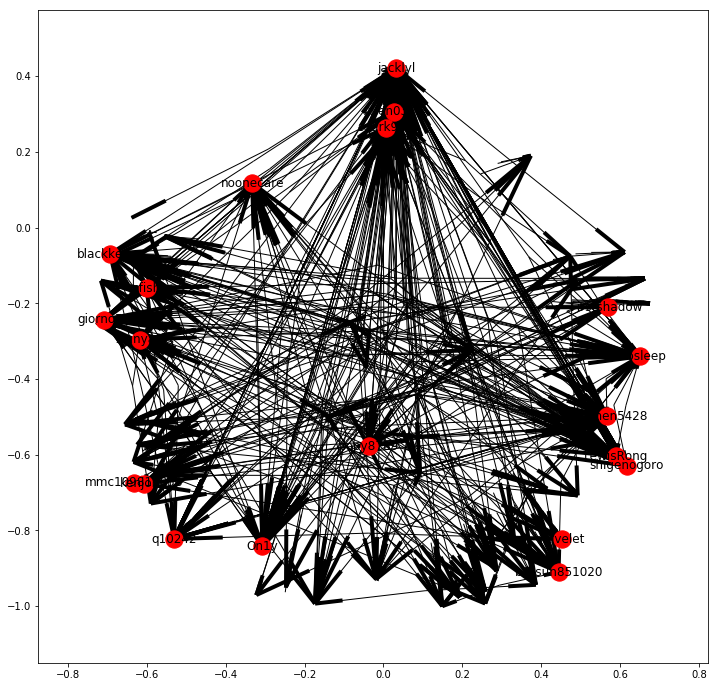

In [15]:
plt.figure(figsize=(12, 12))#nodelist
nx.draw_networkx(G, with_labels=True, nodelist=top_pg_rnk_node, labels={x:x for x in top_pg_rnk_node})
plt.show()

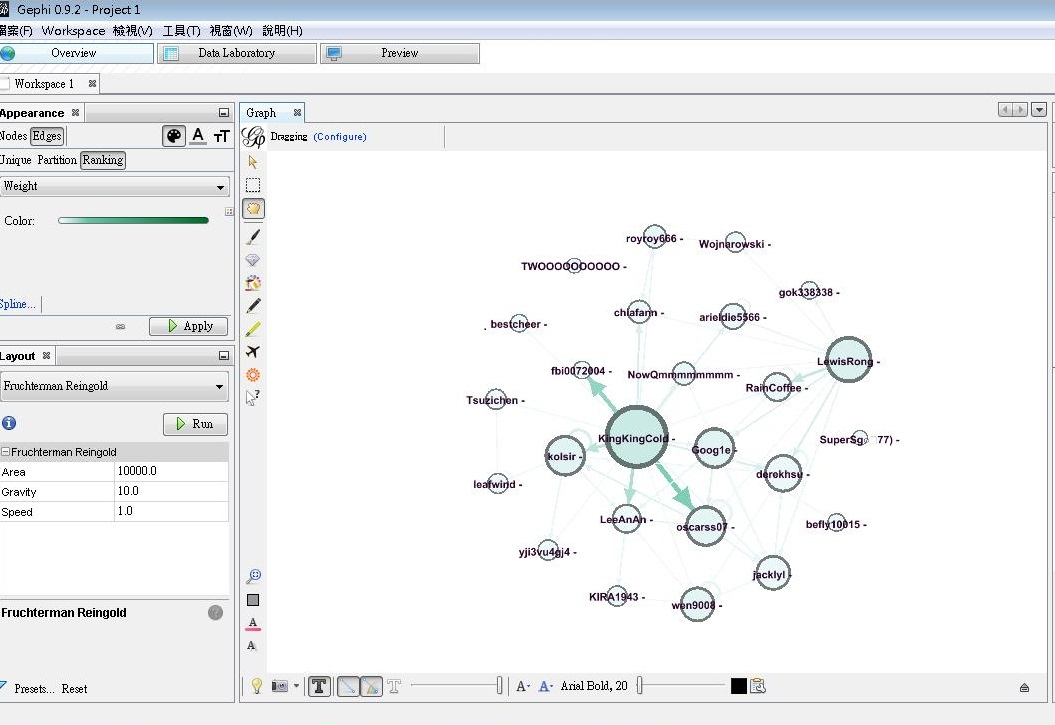

In [17]:
Image(filename = 'ptt.jpg')

# ToDo
#### 1. https://pttpedia.fandom.com/zh/wiki/KingKingCold 比對ptt名人
#### 2. 解析ip(國家) 與 回文時間
#### 3. 增加資料區間
#### 4. 研究其他graph file format，優化效能
#### 5. [研究community detection](https://kknews.cc/zh-tw/news/pp5olqz.html)
#### 6. [igraph](http://landcareweb.com/questions/4756/igraphzhong-she-qu-jian-ce-suan-fa-zhi-jian-you-shi-yao-qu-bie)
#### 7. [add dynamic graph](https://seinecle.github.io/gephi-tutorials/generated-html/converting-a-network-with-dates-into-dynamic.html#_1_dynamic_nodes_with_a_start_date)

In [18]:
#pd.to_datetime(reply.push_ipdatetime[0]+ ' ' + str(art_year) , format='%m/%d %H:%M %Y')
#(reply.push_ipdatetime+ ' ' + str(art_year)).apply(pd.to_datetime(x, format='%m/%d %H:%M %Y'), errors='coerce')
#pitchtype[col].map(lambda x: x.replace(' %','') if type(x) == str else x)